In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import gridspec
import cartopy.crs as ccrs
import cartopy
import itertools
# import tqdm
import datetime
from scipy.stats import linregress
from scipy.interpolate import griddata
import warnings
import pickle
import os
warnings.filterwarnings("ignore")


In [2]:
save_fig = 1

In [4]:
# Load input files
path_AK = "/home/erb/masterproject/MSCI_project/snow_ice/carmen/non_interpolated_data/25km_ease_binned/AK_LARM/dailyFB_25km_2020-2021_season.pkl"
path_CS2 = "/home/erb/masterproject/MSCI_project/snow_ice/carmen/non_interpolated_data/25km_ease_binned/CS2_LARM/dailyFB_25km_2018-2019_season.pkl"

f = open(path_AK,'rb')
AK_ni = pickle.load(f)

f = open(path_CS2,'rb')
CS2_ni = pickle.load(f)

fb_path1 = "/home/erb/masterproject/MSCI_project/snow_ice/carmen/non_interpolated_data/25km_ease_binned/AK_LARM/dailyFB_25km_2018-2019_season.pkl"
fb_path2 = "/home/erb/masterproject/MSCI_project/snow_ice/carmen/non_interpolated_data/25km_ease_binned/CS2_LARM/dailyFB_25km_2018-2019_season.pkl"

ak = []
cs2 = []

ak_std = []
cs2_std = [] 

lon_g = np.load("/home/erb/masterproject/MSCI_project/new_lon_25km.npy")
lat_g = np.load("/home/erb/masterproject/MSCI_project/new_lat_25km.npy")



In [6]:
import numpy as np
import pandas as pd

# Sample data loading function
def load_data(date_str):
    # This function should return the 360x360 array for the given date_str
    return AK_ni[date_str]

# Helper function to generate date range
def generate_date_range(start_date, end_date, date_format='%Y%m%d'):
    return pd.date_range(start=start_date, end=end_date).strftime(date_format).tolist()

# Define the date range
start_date = '20201001'
# end_date = '20190430'
end_date = '20210430'

# Define the period
period = 15  # Example period, adjust as needed
period_half = np.floor(period/2)
# Generate the date range in the correct format
date_range = generate_date_range(start_date, end_date)

# Placeholder for the results
average_arrays = {}
std_arrays = {}

# Iterate over each date in the date range
for date_str in date_range:
    print(date_str)
    # Parse the date
    current_date = pd.to_datetime(date_str, format='%Y%m%d')
    
    # Generate the date range for the +/- period
    start_period = (current_date - pd.Timedelta(days=period_half)).strftime('%Y%m%d')
    end_period = (current_date + pd.Timedelta(days=period_half)).strftime('%Y%m%d')
    
    # Generate the dates within the period
    period_dates = generate_date_range(start_period, end_period)
    
    # Collect all arrays for the period
    arrays = []
    for period_date in period_dates:
        if period_date in AK_ni:
            arrays.append(load_data(period_date))
    
    # Calculate the average of the arrays
    if arrays:
        average_array = np.nanmean(arrays, axis=0)
        average_arrays[date_str] = average_array
        std_array = np.nanstd(arrays, axis=0)
        std_array[std_array==0.0]=np.nan
        std_arrays[date_str] = std_array
# Now average_arrays will contain the average 360x360 array for each date in the specified range



# Now average over full period 

# Define the full period range
full_period_start = '20201001'
# full_period_end = '20190430'
full_period_end = '20210430'

# Generate the date range for the full period
full_period_range = generate_date_range(full_period_start, full_period_end)

# Calculate the average of the standard deviation arrays over the full period
full_period_avg = np.nanmean(np.stack([average_arrays[date_str] for date_str in full_period_range if date_str in average_arrays]), axis=0)
full_period_std_avg = np.nanmean(np.stack([std_arrays[date_str] for date_str in full_period_range if date_str in std_arrays]), axis=0)


if save_fig == 1:

    date = "2020-2021/"

    np.save('/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/error_map/' + date + "AK_Period_" + str(period) + 'j', full_period_std_avg)





20201001
20201002
20201003
20201004
20201005
20201006
20201007
20201008
20201009
20201010
20201011
20201012
20201013
20201014
20201015
20201016
20201017
20201018
20201019
20201020
20201021
20201022
20201023
20201024
20201025
20201026
20201027
20201028


20201029
20201030
20201031
20201101
20201102
20201103
20201104
20201105
20201106
20201107
20201108
20201109
20201110
20201111
20201112
20201113
20201114
20201115
20201116
20201117
20201118
20201119
20201120
20201121
20201122
20201123
20201124
20201125
20201126
20201127
20201128
20201129
20201130
20201201
20201202
20201203
20201204
20201205
20201206
20201207
20201208
20201209
20201210
20201211
20201212
20201213
20201214
20201215
20201216
20201217
20201218
20201219
20201220
20201221
20201222
20201223
20201224
20201225
20201226
20201227
20201228
20201229
20201230
20201231
20210101
20210102
20210103
20210104
20210105
20210106
20210107
20210108
20210109
20210110
20210111
20210112
20210113
20210114
20210115
20210116
20210117
20210118
20210119
20210120
20210121
20210122
20210123
20210124
20210125
20210126
20210127
20210128
20210129
20210130
20210131
20210201
20210202
20210203
20210204
20210205
20210206
20210207
20210208
20210209
20210210
20210211
20210212
20210213
20210214
20210215
20210216
2

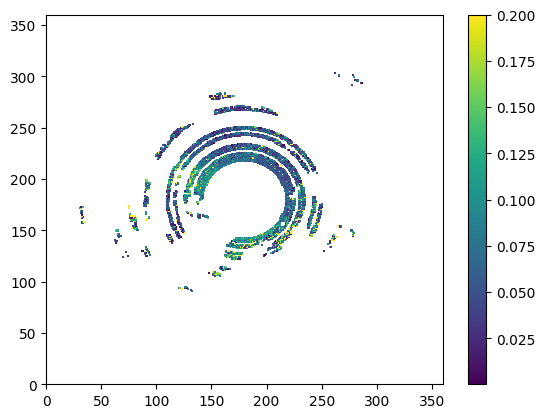

In [29]:
# AK 3J
plt.pcolor(full_period_std_avg, vmax = 0.2)
plt.colorbar()

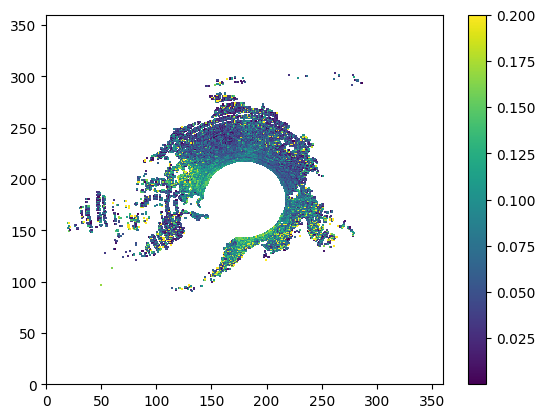

In [27]:
# AK 7J
plt.pcolor(full_period_std_avg, vmax = 0.2)
plt.colorbar()

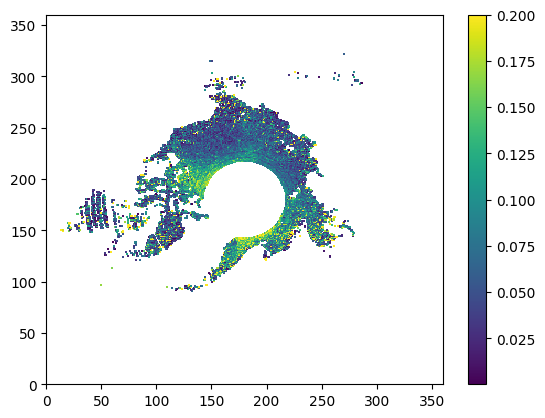

In [25]:
# AK 15J
plt.pcolor(full_period_std_avg, vmax = 0.2)
plt.colorbar()

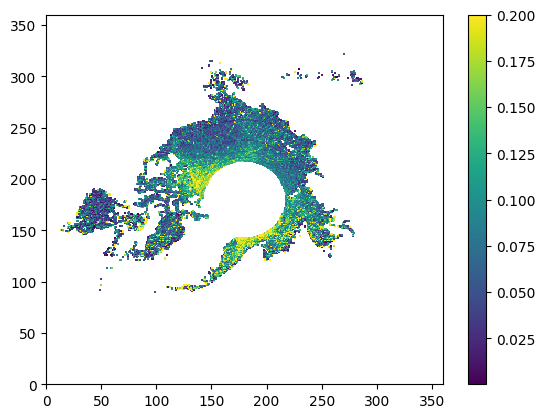

In [31]:
# AK 30J
plt.pcolor(full_period_std_avg, vmax = 0.2)
plt.colorbar()

(array([1.160e+03, 3.192e+03, 3.495e+03, 2.589e+03, 1.465e+03, 7.920e+02,
        5.230e+02, 3.350e+02, 2.600e+02, 1.610e+02, 1.210e+02, 8.600e+01,
        6.000e+01, 5.600e+01, 3.400e+01, 3.300e+01, 2.300e+01, 1.600e+01,
        1.100e+01, 1.100e+01, 9.000e+00, 1.200e+01, 5.000e+00, 2.000e+00,
        3.000e+00, 7.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+0

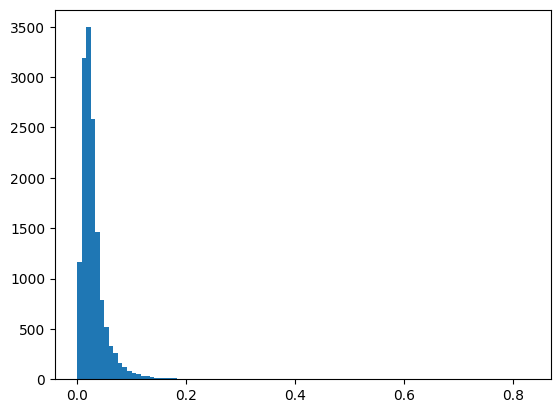

In [66]:
plt.hist(full_period_std_avg.ravel(),bins=100)

In [10]:
import numpy as np
import pandas as pd

# Sample data loading function
def load_data(date_str):
    # This function should return the 360x360 array for the given date_str
    return CS2_ni[date_str]

# Helper function to generate date range
def generate_date_range(start_date, end_date, date_format='%Y%m%d'):
    return pd.date_range(start=start_date, end=end_date).strftime(date_format).tolist()

# Define the date range
start_date = '20181001'
end_date = '20190430'

# Define the period
period = 15 # Example period, adjust as needed
period_half = np.floor(period/2)
# Generate the date range in the correct format
date_range = generate_date_range(start_date, end_date)

# Placeholder for the results
average_arrays = {}
std_arrays = {}

# Iterate over each date in the date range
for date_str in date_range:
    print(date_str)
    # Parse the date
    current_date = pd.to_datetime(date_str, format='%Y%m%d')
    
    # Generate the date range for the +/- period
    start_period = (current_date - pd.Timedelta(days=period_half)).strftime('%Y%m%d')
    end_period = (current_date + pd.Timedelta(days=period_half)).strftime('%Y%m%d')
    
    # Generate the dates within the period
    period_dates = generate_date_range(start_period, end_period)
    
    # Collect all arrays for the period
    arrays = []
    for period_date in period_dates:
        if period_date in CS2_ni:
            arrays.append(load_data(period_date))
    
    # Calculate the average of the arrays
    if arrays:
        average_array = np.nanmean(arrays, axis=0)
        average_arrays[date_str] = average_array
        std_array = np.nanstd(arrays, axis=0)
        std_array[std_array==0.0]=np.nan
        std_arrays[date_str] = std_array
# Now average_arrays will contain the average 360x360 array for each date in the specified range



# Now average over full period 

# Define the full period range
full_period_start = '20181001'
full_period_end = '20190430'

# Generate the date range for the full period
full_period_range = generate_date_range(full_period_start, full_period_end)

# Calculate the average of the standard deviation arrays over the full period
full_period_avg = np.nanmean(np.stack([average_arrays[date_str] for date_str in full_period_range if date_str in average_arrays]), axis=0)
full_period_std_avg = np.nanmean(np.stack([std_arrays[date_str] for date_str in full_period_range if date_str in std_arrays]), axis=0)

if save_fig == 1:

    date = "2018-2019/"

    np.save('/home/erb/masterproject/MSCI_project/snow_ice/CS_AK_2p_LARM/error_map/' + date + "CS2_Period_" + str(period) + 'j', full_period_std_avg)




20181001
20181002
20181003
20181004
20181005
20181006
20181007
20181008
20181009
20181010
20181011
20181012
20181013
20181014
20181015
20181016
20181017
20181018
20181019
20181020
20181021
20181022
20181023
20181024
20181025
20181026
20181027
20181028
20181029
20181030
20181031
20181101
20181102
20181103
20181104
20181105
20181106
20181107
20181108
20181109
20181110
20181111
20181112
20181113
20181114
20181115
20181116
20181117
20181118
20181119
20181120
20181121
20181122
20181123
20181124
20181125
20181126
20181127
20181128
20181129
20181130
20181201
20181202
20181203
20181204
20181205
20181206
20181207
20181208
20181209
20181210
20181211
20181212
20181213
20181214
20181215
20181216
20181217
20181218
20181219
20181220
20181221
20181222
20181223
20181224
20181225
20181226
20181227
20181228
20181229
20181230
20181231
20190101
20190102
20190103
20190104
20190105
20190106
20190107
20190108
20190109
20190110
20190111
20190112
20190113
20190114
20190115
20190116
20190117
20190118
20190119
2

In [79]:
error_CS2 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/error_map/2018-2019/CS2_Period_7j.npy')
error_IS2 = np.load('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/error_map/2018-2019/IS2_Period_7j.npy')


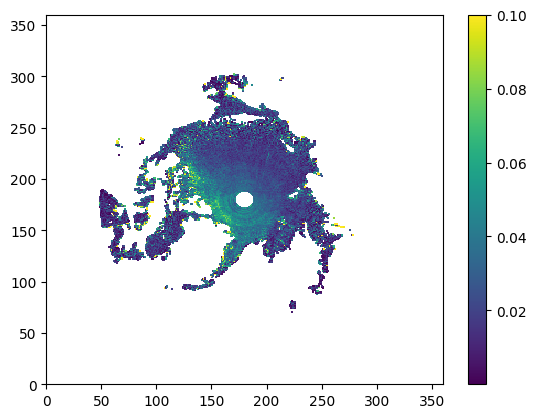

In [82]:
plt.pcolor(error_CS2, vmax = 0.1)
plt.colorbar()

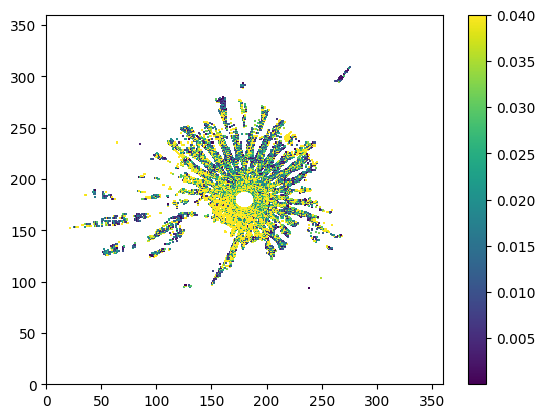

In [68]:
plt.pcolor(std_arrays['20190401'],vmax=0.04)
plt.colorbar()

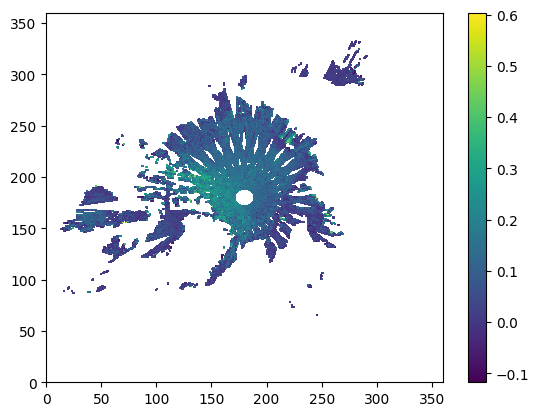

In [69]:
plt.pcolor(average_arrays['20190401'])
plt.colorbar()

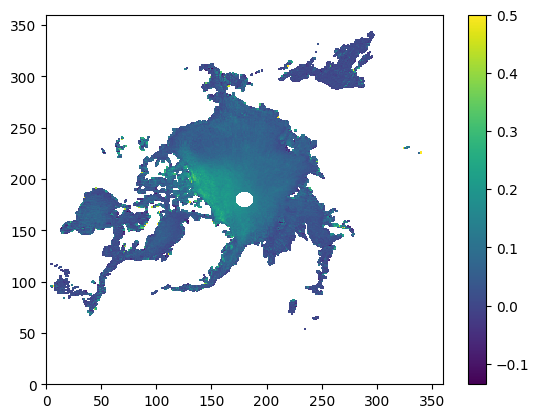

In [70]:
plt.pcolor(full_period_avg,vmax=0.5)
plt.colorbar()

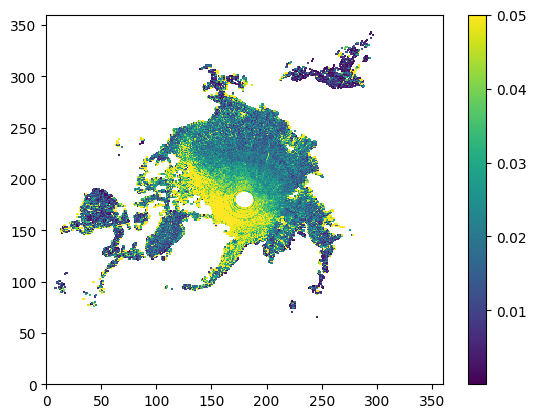

In [71]:
#period = 1
plt.pcolor(full_period_std_avg,vmax=0.05)
plt.colorbar()

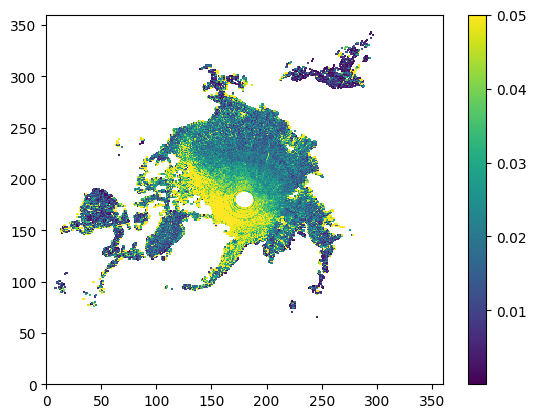

In [72]:
#period = 3
plt.pcolor(full_period_std_avg,vmax=0.05)
plt.colorbar()

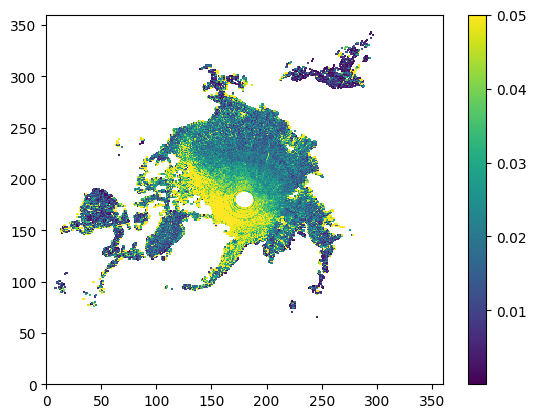

In [73]:
#period = 5 
plt.pcolor(full_period_std_avg,vmax=0.05)
plt.colorbar()

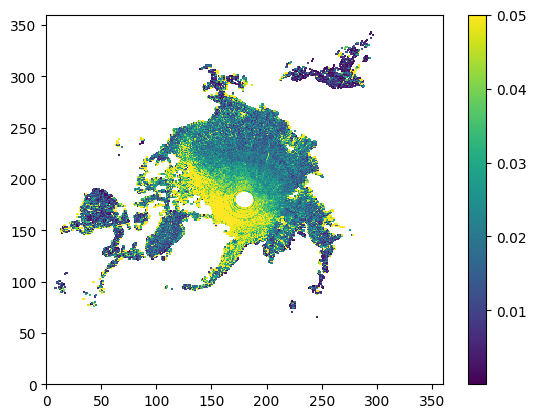

In [74]:
#period = 7 
plt.pcolor(full_period_std_avg,vmax=0.05)
plt.colorbar()

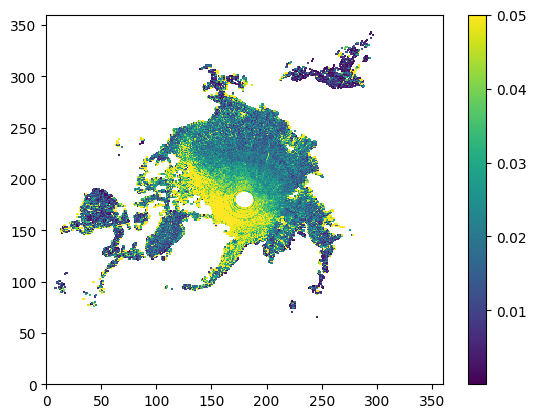

In [75]:
#period = 30 
plt.pcolor(full_period_std_avg,vmax=0.05)
plt.colorbar()

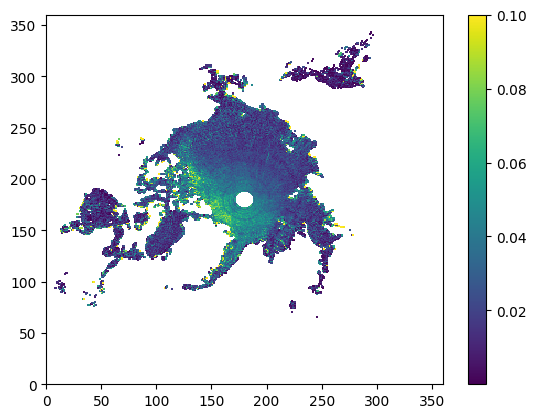

In [76]:
#period = 30 
plt.pcolor(full_period_std_avg,vmax=0.1)
plt.colorbar()

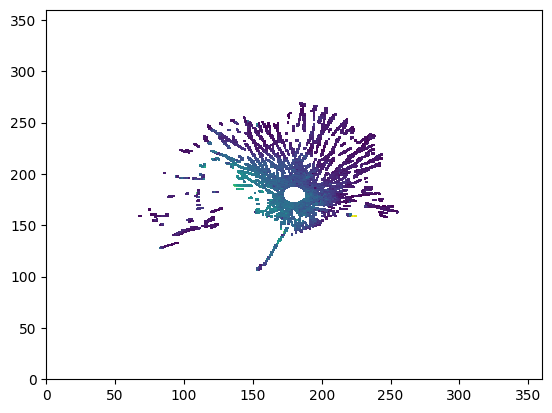

In [77]:
test = np.nanmean((IS2_ni['20181105'], IS2_ni['20181106'], IS2_ni['20181107'], IS2_ni['20181108'], IS2_ni['20181109'], IS2_ni['20181110'],
                   IS2_ni['20181111'], IS2_ni['20181112']), axis = 0)
test_2 = np.nanstd((IS2_ni['20181105'], IS2_ni['20181106'], IS2_ni['20181107'], IS2_ni['20181108'], IS2_ni['20181109'], IS2_ni['20181110'],
                   IS2_ni['20181111'], IS2_ni['20181112']), axis = 0)
plt.pcolor(test)

Error in callback <function _draw_all_if_interactive at 0x7f9ef5f18820> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

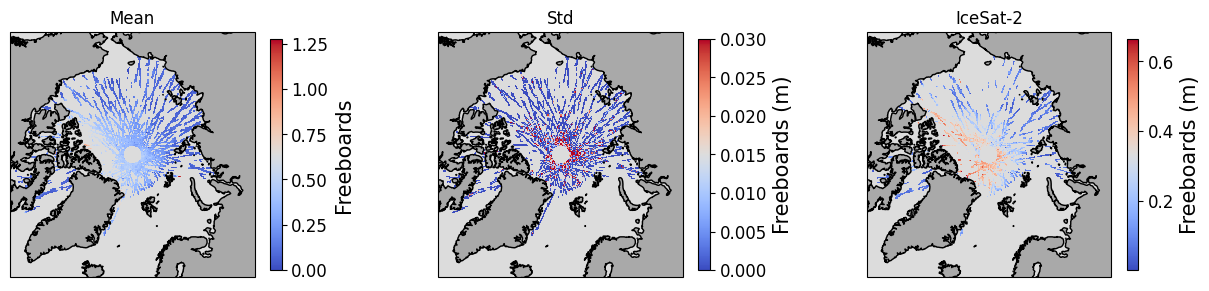

In [78]:
fig = plt.figure(figsize = (15,10))
spec = gridspec.GridSpec(ncols=3, nrows=1,wspace=0.4)

ax1 = fig.add_subplot(spec[0], projection=ccrs.NorthPolarStereo())
ax1.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax1.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax1.coastlines()
ax1.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map = ax1.pcolormesh(lon_g,lat_g, test,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree())
plt.title('Mean')
a = fig.colorbar(p_map,shrink=0.3, pad=0.05)
a.ax.tick_params(labelsize=12)
a.set_label('Freeboards',fontsize=15)


ax2 = fig.add_subplot(spec[1],projection=ccrs.NorthPolarStereo())
ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax2.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax2.coastlines()
ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map = ax2.pcolormesh(lon_g,lat_g, test_2,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmax = 0.03)
plt.title("Std")
a = fig.colorbar(p_map, shrink=0.3, pad=0.05)
a.ax.tick_params(labelsize=12)
a.set_label('Freeboards (m)',fontsize=15)

ax3 = fig.add_subplot(spec[2],projection=ccrs.NorthPolarStereo())
ax3.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax3.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax3.coastlines()
ax3.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map = ax3.pcolormesh(lon_g,lat_g, IS2_ni['20181105'],cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree())
p_map = ax3.pcolormesh(lon_g,lat_g, IS2_ni['20181106'],cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree())
p_map = ax3.pcolormesh(lon_g,lat_g, IS2_ni['20181107'],cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree())
p_map = ax3.pcolormesh(lon_g,lat_g, IS2_ni['20181108'],cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree())
plt.title("IceSat-2")
a = fig.colorbar(p_map, shrink=0.3, pad=0.05)
a.ax.tick_params(labelsize=12)
a.set_label('Freeboards (m)',fontsize=15)




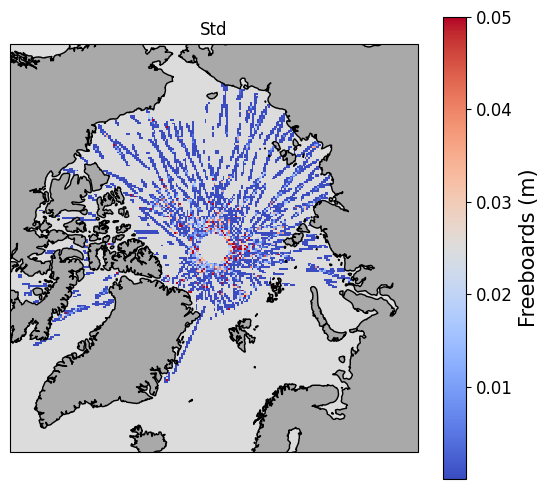

In [ ]:
fig = plt.figure(figsize = (25,20))
ax2 = fig.add_subplot(spec[1],projection=ccrs.NorthPolarStereo())
ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax2.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax2.coastlines()
ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map = ax2.pcolormesh(lon_g,lat_g, test_2,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmax = 0.05)
test_2[test_2==0.0]=np.nan
p_map = ax2.pcolormesh(lon_g,lat_g, test_2,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmax = 0.05)
plt.title("Std")
a = fig.colorbar(p_map, shrink=0.3, pad=0.05)
a.ax.tick_params(labelsize=12)
a.set_label('Freeboards (m)',fontsize=15)


(array([180., 161., 165., 149., 124.,  96.,  86.,  63.,  38.,  34.,  18.,
         15.,  19.,  21.,  12.,   9.,   5.,   6.,   2.,   2.,   4.,   1.,
          2.,   2.,   1.,   1.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([3.84210168e-05, 4.49309632e-03, 8.94777162e-03, 1.34024469e-02,
        1.78571222e-02, 2.23117975e-02, 2.67664728e-02, 3.12211481e-02,
        3.56758234e-02, 4.01304987e-02, 4.45851740e-02, 4.90398493e-02,
        5.34945246e-02, 5.79491999e-02, 6.24038752e-02, 6.68585505e-02,
        7.13132258e-02, 7.57679011e-02, 8.02225764e-02, 8.46772517e-02,
        8.91319270e-02, 9.35866023e-02, 9.80412776e-02, 1.02495953e-01,
        1.06950628e-01, 1.11405304e-01, 1.15859979e-01, 1.20314654e-01,
        1.24769329e-01, 1.29224005e-01, 1.33678680e-01, 1.38133355e-01,
        1.42588031e-01, 1.47042706e-01, 1.51497381e-01, 1.55952057e-01,
        1.

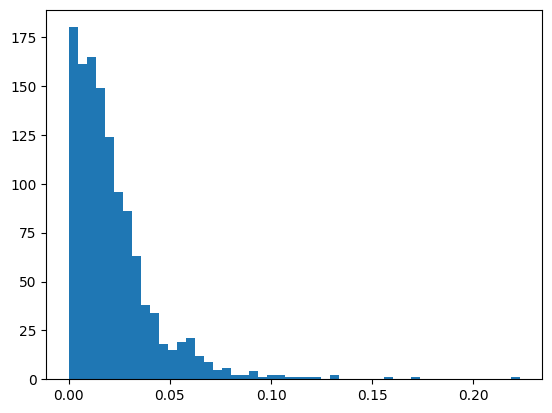

In [ ]:
plt.hist(test_2.ravel(),bins=50)

In [ ]:
! pip install pandas

In [ ]:
import numpy as np
import pandas as pd
# Supposons que CS2_ni est déjà chargé et accessible
# Exemple de structure de CS2_ni :
# CS2_ni = {'20181105': array([...]), '20181106': array([...]), ...}

# Créez une liste vide pour stocker les arrays de chaque jour
data_by_day = []

# Parcourez chaque entrée dans CS2_ni
for key in CS2_ni.keys():
    # Convertissez la clé (date) en datetime pour faciliter le filtrage
    date_key = pd.to_datetime(key)
    # Vérifiez si la date est dans le mois actuel
    if date_key.month == 11:  # Remplacez 11 par le numéro du mois souhaité
        data_by_day.append(CS2_ni[key])


import numpy as np

# Supposons que data_by_day est déjà chargé et contient les données pour chaque jour
# Exemple de structure de data_by_day : [matrice_jour_1, matrice_jour_2, ..., matrice_jour_N]

# Initialisation d'une matrice vide pour stocker les données de tous les jours
all_days_data = np.empty((30, 360, 360))

# Itération sur chaque jour dans data_by_day
for day_index, day_data in enumerate(data_by_day):
    print(day_index)
    # Concaténation des données du jour actuel à all_days_data
    all_days_data += day_data

# Calcul de la moyenne sur toutes les dates du mois, en ignorant les NaN
test_cs2 = np.nanmean(all_days_data, axis=0)
test_2_cs2 = np.nanstd(all_days_data, axis=0)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


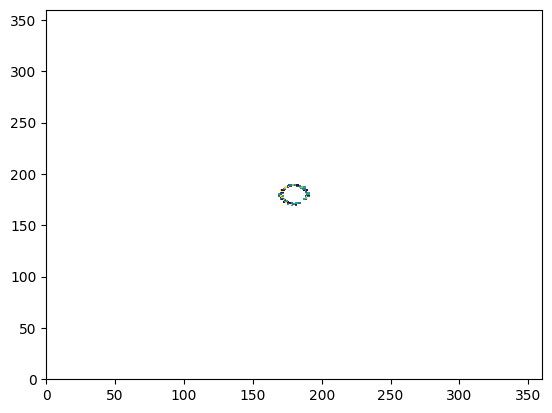

In [ ]:
plt.pcolor(test_2_cs2)

In [ ]:
fig = plt.figure(figsize = (25,20))
ax2 = fig.add_subplot(spec[1],projection=ccrs.NorthPolarStereo())
ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax2.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax2.coastlines()
ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map = ax2.pcolormesh(lon_g,lat_g, test_2_cs2,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmax = 0.05)
test_2_cs2[test_2_cs2==0.0]=np.nan
p_map = ax2.pcolormesh(lon_g,lat_g, test_2_cs2,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmax = 0.05)
plt.title("Std")
a = fig.colorbar(p_map, shrink=0.3, pad=0.05)
a.ax.tick_params(labelsize=12)
a.set_label('Freeboards (m)',fontsize=15)


Error in callback <function flush_figures at 0x7f9ec80168c0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

(array([18.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 19.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([8.88178420e-16, 9.59232693e-16, 1.03028697e-15, 1.10134124e-15,
        1.17239551e-15, 1.24344979e-15, 1.31450406e-15, 1.38555833e-15,
        1.45661261e-15, 1.52766688e-15, 1.59872116e-15, 1.66977543e-15,
        1.74082970e-15, 1.81188398e-15, 1.88293825e-15, 1.95399252e-15,
        2.02504680e-15, 2.09610107e-15, 2.16715534e-15, 2.23820962e-15,
        2.30926389e-15, 2.38031816e-15, 2.45137244e-15, 2.52242671e-15,
        2.59348099e-15, 2.66453526e-15, 2.73558953e-15, 2.80664381e-15,
        2.87769808e-15, 2.94875235e-15, 3.01980663e-15, 3.09086090e-15,
        3.16191517e-15, 3.23296945e-15, 3.30402372e-15, 3.37507799e-15,
        3.44613227e-15, 3.51718654e-15, 3.58824082e-15, 3.65929509e-

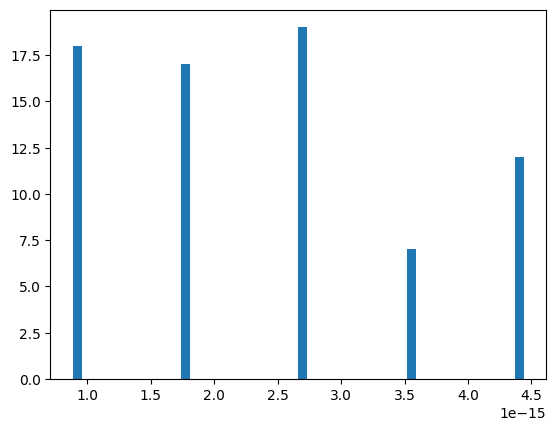

In [ ]:
plt.hist(test_2_cs2.ravel(),bins=50)